# 相关系数热力图可视化
# 2024.11.28

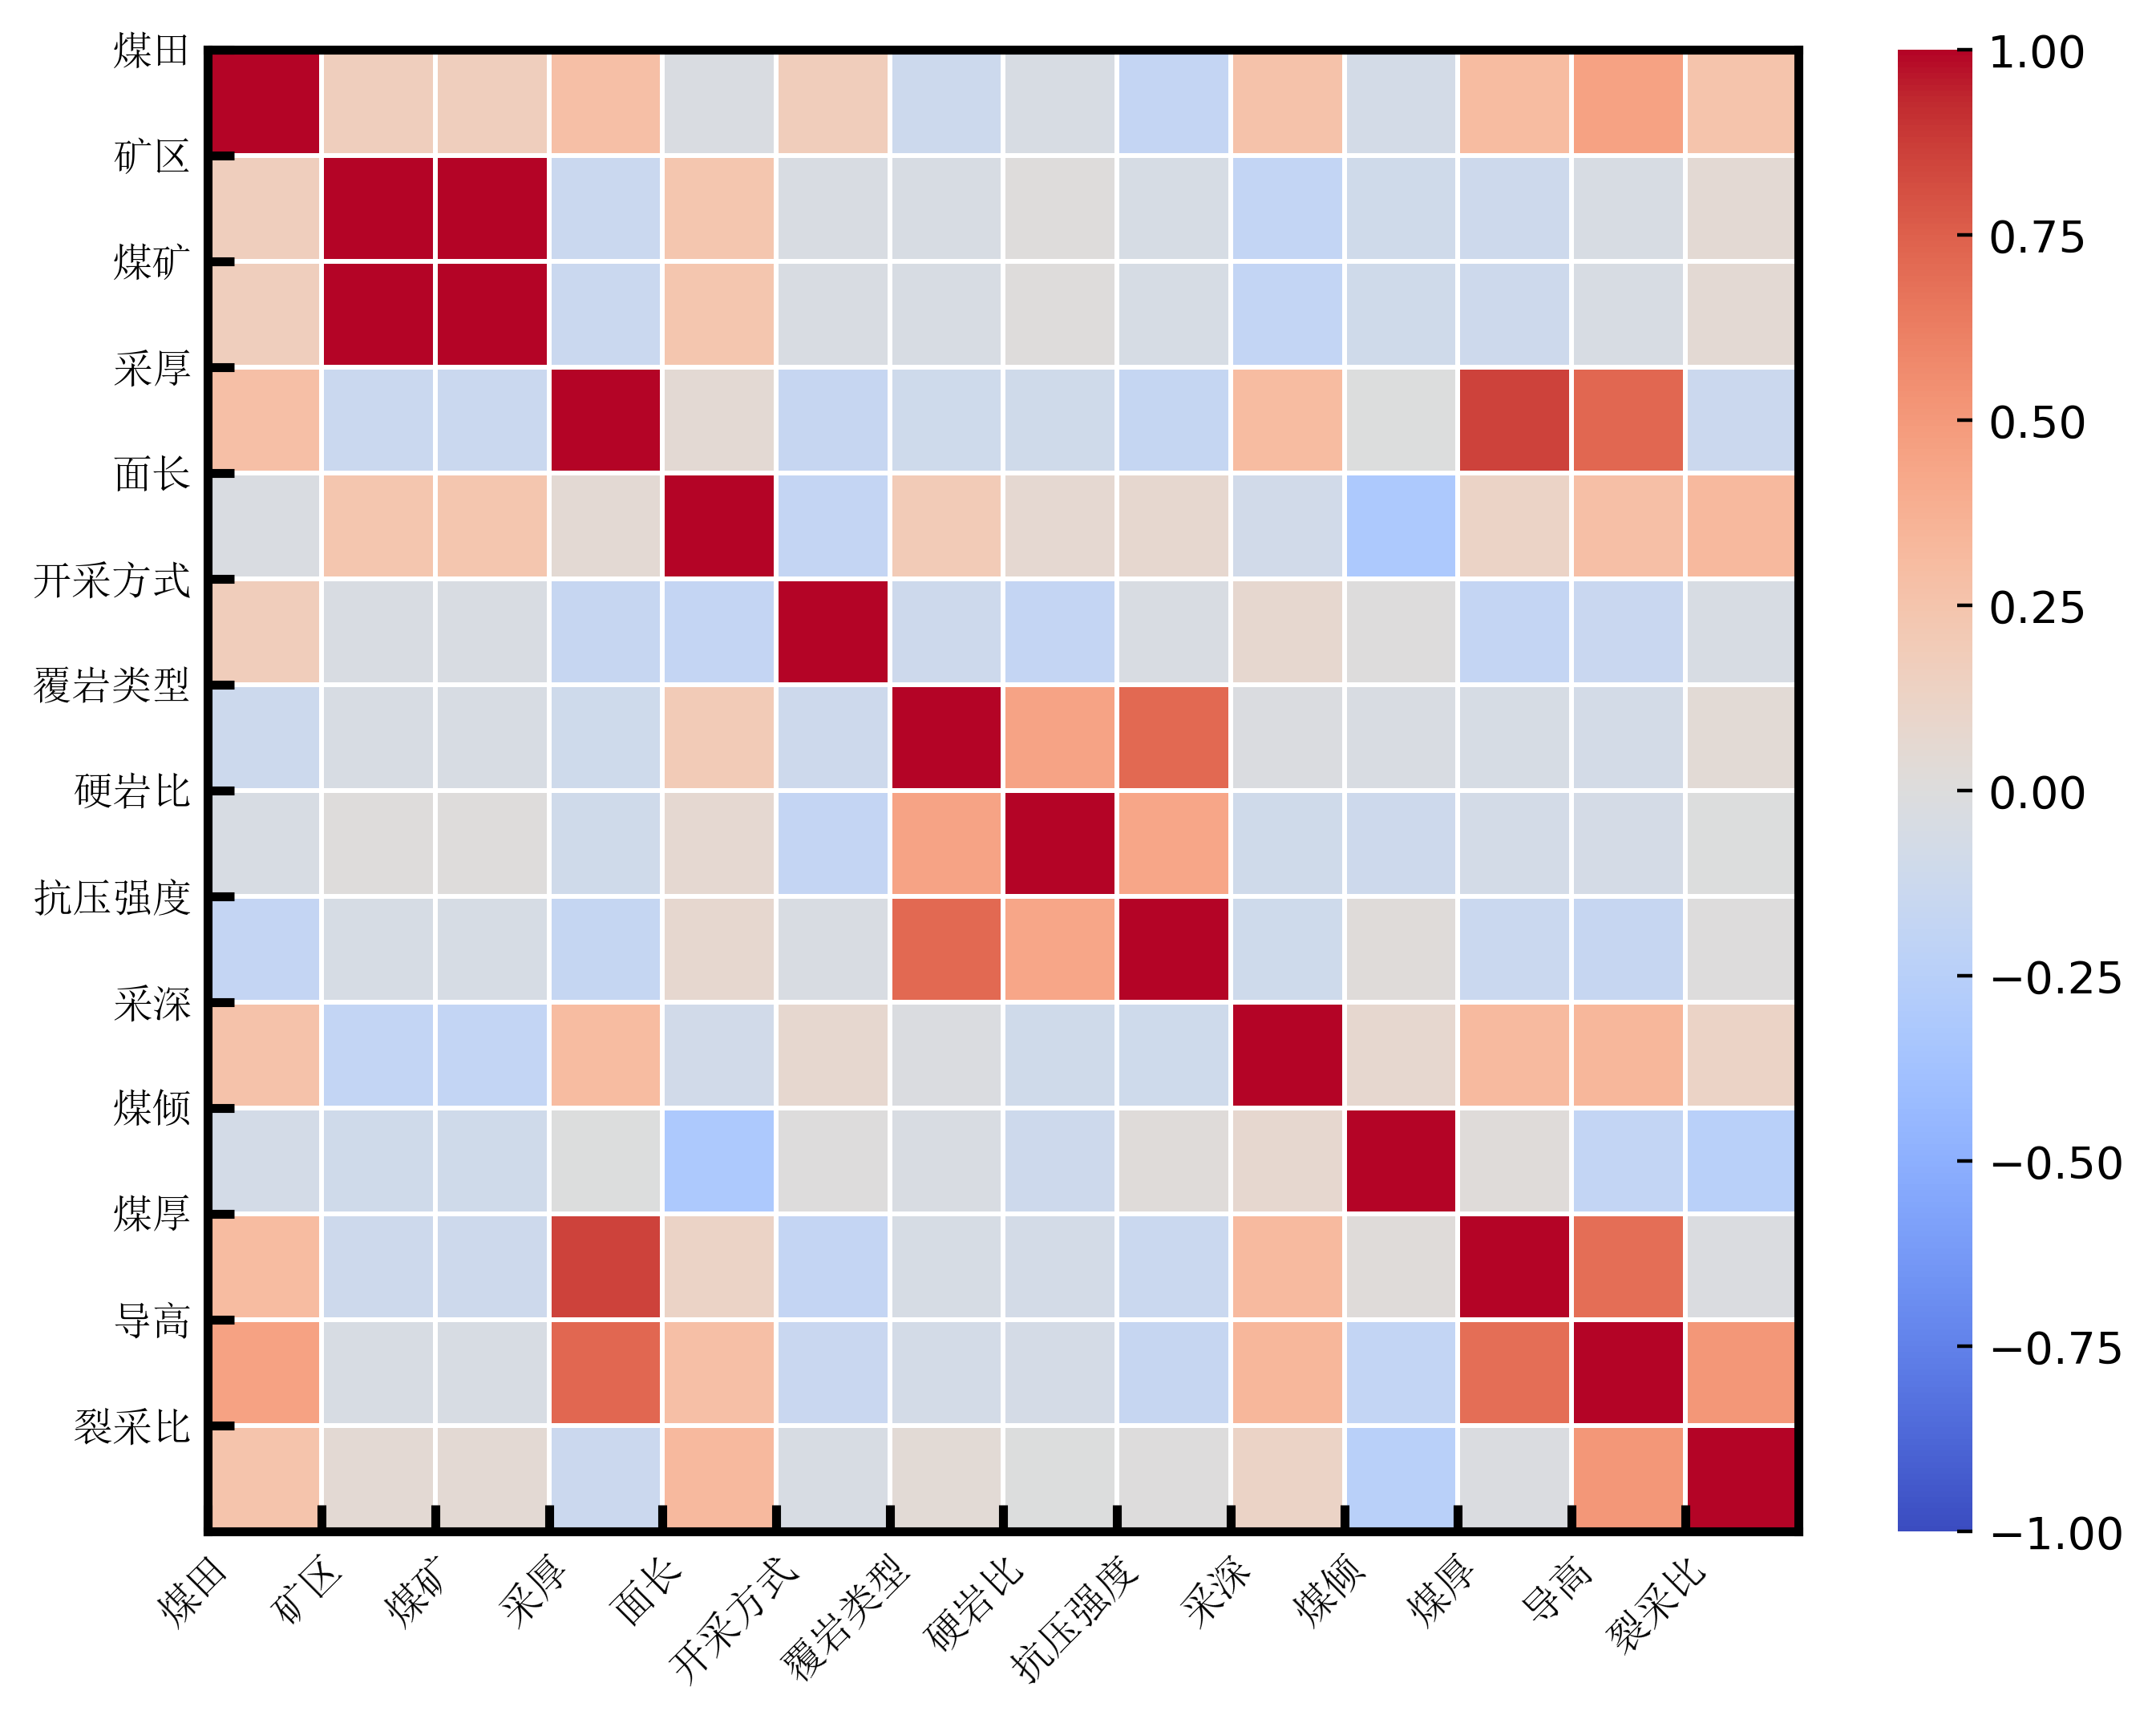

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#from matplotlib.colors import LogNorm
#from matplotlib.patches import Rectangle

from matplotlib.font_manager import FontProperties

import missingno as msno

#import scipy 
#from scipy.stats import spearmanr
#from scipy.stats import pearsonr
#%matplotlib inline

In [2]:
# 从CSV文件中读取数据
daogao_df = pd.read_csv('20241123normalization_sunyu.csv',encoding='gbk',header=0)  #,header = None, 0, 1


In [3]:
daogao_df

,index,meitian_cat,kuangqu_cat,meikuang_cat,caihou,mianchang,MiningWay,fuyanleixing,yingyanbi,kangyaqiangdu,caishen,qingjiao,meihou,daogao,liecaibi
0,0,0.010856,0.008701,0.008701,0.084168,0.031166,0.059812,0.040580,0.001050,0.007203,0.084002,0.110218,0.120162,0.072094,0.048302
1,1,0.010856,0.008701,0.008701,0.115431,0.029398,0.059812,0.040580,0.001050,0.007203,0.087307,0.100634,0.124364,0.074647,0.036468
2,2,0.010856,0.008701,0.008701,0.101742,0.029968,0.009969,0.040580,0.001050,0.007203,0.084002,0.071882,0.089071,0.070615,0.039142
3,3,0.094986,0.056556,0.056556,0.110991,0.059935,0.059812,0.040580,0.041910,0.015295,0.076041,0.019168,0.100835,0.134074,0.068123
4,4,0.094986,0.056556,0.056556,0.060120,0.059935,0.059812,0.060871,0.041910,0.015295,0.076015,0.021564,0.058821,0.107631,0.100958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,275,0.062419,0.069607,0.069607,0.016649,0.059935,0.069781,0.040580,0.027310,0.022603,0.020105,0.023961,0.016806,0.008400,0.028452
276,276,0.059705,0.067432,0.067432,0.011099,0.067427,0.049843,0.060871,0.069325,0.052741,0.016525,0.032586,0.012604,0.017360,0.088202
277,277,0.092272,0.110936,0.110936,0.036997,0.040756,0.069781,0.040580,0.022058,0.022603,0.048198,0.033545,0.033612,0.019880,0.030302
278,278,0.092272,0.110936,0.110936,0.033297,0.044952,0.069781,0.040580,0.026260,0.022603,0.049437,0.035941,0.033612,0.016912,0.028643


In [4]:
daogao_df = daogao_df.drop('index',axis = 1);

<Axes: >

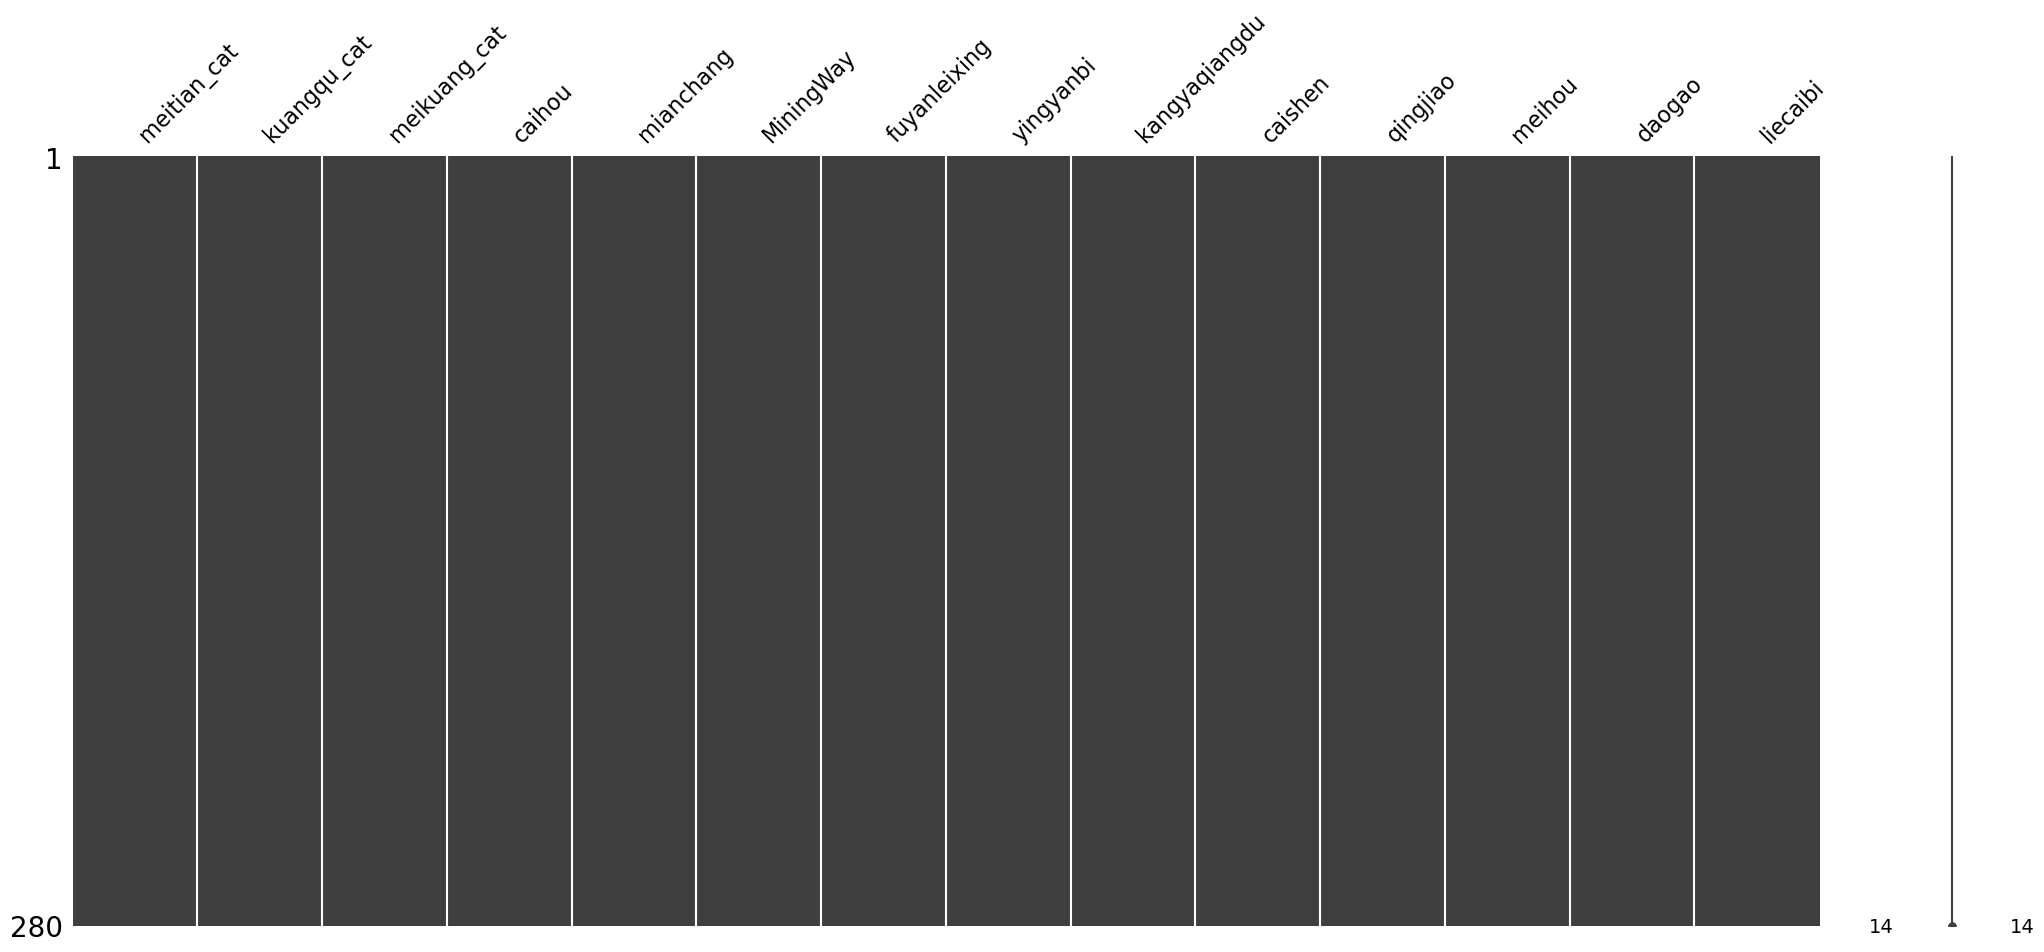

In [5]:
# 可视化缺失值
msno.matrix(daogao_df)

In [ ]:
# 删除包含缺失值的行
daogao_df.dropna(inplace=True)

In [6]:
# 计算相关系数矩阵
corr_matrix = daogao_df.corr()

In [7]:
corr_matrix

,meitian_cat,kuangqu_cat,meikuang_cat,caihou,mianchang,MiningWay,fuyanleixing,yingyanbi,kangyaqiangdu,caishen,qingjiao,meihou,daogao,liecaibi
meitian_cat,1.000000,0.170554,0.170554,0.285401,-0.025333,0.178160,-0.119565,-0.043816,-0.179385,0.261228,-0.076552,0.311895,0.453200,0.251725
kuangqu_cat,0.170554,1.000000,1.000000,-0.137131,0.240384,-0.039053,-0.040963,0.011058,-0.053838,-0.186923,-0.097671,-0.109754,-0.041174,0.047656
meikuang_cat,0.170554,1.000000,1.000000,-0.137131,0.240384,-0.039053,-0.040963,0.011058,-0.053838,-0.186923,-0.097671,-0.109754,-0.041174,0.047656
caihou,0.285401,-0.137131,-0.137131,1.000000,0.052739,-0.163214,-0.105766,-0.096313,-0.164623,0.305133,-0.000572,0.853077,0.720074,-0.132652
mianchang,-0.025333,0.240384,0.240384,0.052739,1.000000,-0.174790,0.201053,0.069243,0.073415,-0.088127,-0.313168,0.118757,0.282145,0.322488
MiningWay,0.178160,-0.039053,-0.039053,-0.163214,-0.174790,1.000000,-0.110742,-0.178272,-0.036965,0.077582,0.007544,-0.174200,-0.145221,-0.045165
fuyanleixing,-0.119565,-0.040963,-0.040963,-0.105766,0.201053,-0.110742,1.000000,0.450763,0.714280,-0.016496,-0.031840,-0.050659,-0.071261,0.045314
yingyanbi,-0.043816,0.011058,0.011058,-0.096313,0.069243,-0.178272,0.450763,1.000000,0.430408,-0.093969,-0.112661,-0.073757,-0.068167,-0.005983
kangyaqiangdu,-0.179385,-0.053838,-0.053838,-0.164623,0.073415,-0.036965,0.714280,0.430408,1.000000,-0.105162,0.022575,-0.136877,-0.162281,0.001006
caishen,0.261228,-0.186923,-0.186923,0.305133,-0.088127,0.077582,-0.016496,-0.093969,-0.105162,1.000000,0.075869,0.318714,0.337649,0.124303


<Axes: >

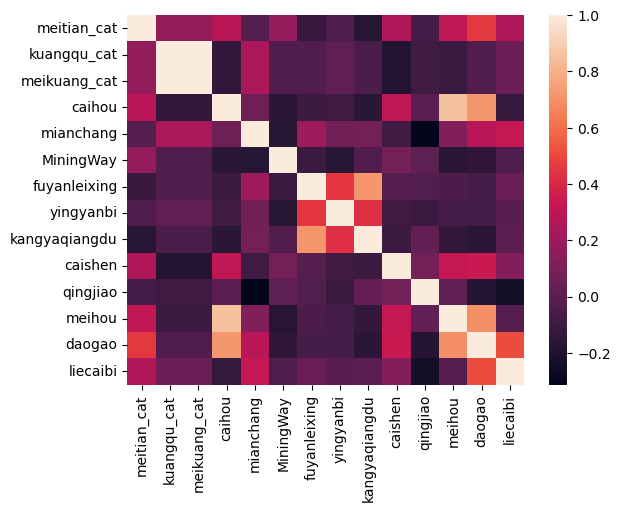

In [8]:
sns.heatmap(corr_matrix,annot=False)

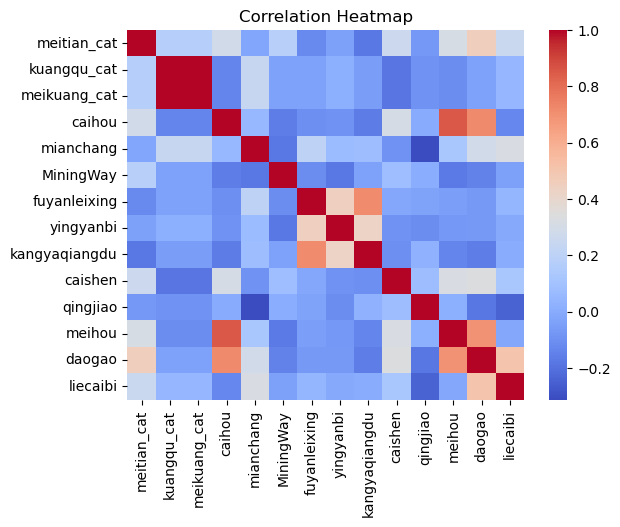

In [9]:
# 绘制相关系数矩阵的热图
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm') #True,
plt.title('Correlation Heatmap')
plt.show()

绘制相关性热力图，可以使用 seaborn 和 matplotlib 库来进行可视化。优化点：
1.字体设置：annot_kws={"size": 12, "weight": 'bold', "color": 'black'} 用于调整热力图上数字的字体大小、粗细和颜色，使其更加清晰。
        格子中数据（字体大小、磅值、颜色）等设置：annot_kws
2.调整颜色条：cbar_kws={'shrink': 0.8} 将颜色条缩小，使图表空间更加紧凑。
3.热力图的颜色范围：vmin=-1 和 vmax=1 确保相关性值的范围被正确反映出来（-1 表示完全负相关，1 表示完全正相关）。
4.网格线：linewidths=0.8 设置网格线的宽度，使得分隔线更加细致。
5.标题和坐标轴：设置字体大小和加粗，使得图表更加专业。

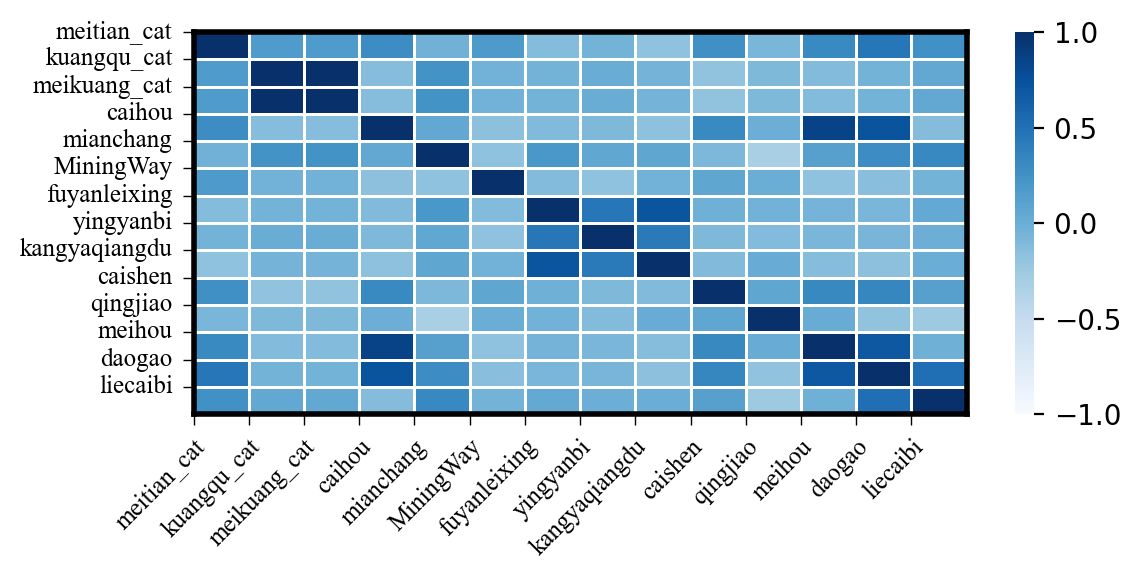

In [10]:
#2024.11.28 sunyu
# 指定英文字体
font_en = FontProperties(fname=r"c:\windows\Fonts\times.ttf", size=9)

# 可视化相关系数
fig, ax = plt.subplots(figsize=(6,3),dpi=200)
sns.heatmap(corr_matrix, cmap='Blues',fmt=".1f",annot=False, annot_kws={"size": 8, "weight": 'normal', "color": 'black'}, linewidths=0.5, cbar=True, square=False, vmin=-1, vmax=1.0)
# 设置x轴、y轴标签
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontproperties=font_en)
ax.set_yticklabels(corr_matrix.columns, fontproperties=font_en)
# 添加框线和坐标轴, 确保框线显示
ax.spines['top'].set_visible(True)   # 上边框
ax.spines['top'].set_linewidth(2)   # 边框宽度
ax.spines['top'].set_color('black') # 上边框颜色
ax.spines['right'].set_visible(True) # 右边框
ax.spines['right'].set_linewidth(2) # 边框宽度
ax.spines['right'].set_color('black') # 右边框颜色
ax.spines['bottom'].set_visible(True) # 下边框
ax.spines['bottom'].set_linewidth(2) # 边框宽度
ax.spines['bottom'].set_color('black') # 下边框颜色
ax.spines['left'].set_visible(True)   # 左边框
ax.spines['left'].set_linewidth(2)   # 边框宽度
ax.spines['left'].set_color('black') # 左边框颜色

# 将x轴标签旋转45度以便更好的展示
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")

# 确保框线和刻度线显示
#plt.rcParams.update({'xtick.direction': 'in', 'ytick.direction': 'in'})  # 设置x轴和y轴刻度线方向向内
ax.tick_params(axis='both', which='both', length=4, width=0.5, colors='black')

plt.savefig("correlation_en20241128.png", bbox_inches='tight', dpi=300)
# 显示图像
plt.tight_layout()
plt.show()

In [11]:
# 相关系数矩阵保存为csv文件
corr_matrix.to_csv('corr_matrix20241125.csv', index=False,encoding='ANSI') 

In [12]:
# 将列名修改为中文，再次读入相关系数矩阵
corr_matrix = pd.read_csv('corr_matrix20241125_sunyu.csv',encoding='gbk') #csv里有中文，在windows系统上可以直接用encoding='gbk'，

In [13]:
corr_matrix 

,煤田,矿区,煤矿,采厚,面长,开采方式,覆岩类型,硬岩比,抗压强度,采深,煤倾,煤厚,导高,裂采比
0,1.000000,0.170554,0.170554,0.285401,-0.025333,0.178160,-0.119565,-0.043816,-0.179385,0.261228,-0.076552,0.311895,0.453200,0.251725
1,0.170554,1.000000,1.000000,-0.137131,0.240384,-0.039053,-0.040963,0.011058,-0.053838,-0.186923,-0.097671,-0.109754,-0.041174,0.047656
2,0.170554,1.000000,1.000000,-0.137131,0.240384,-0.039053,-0.040963,0.011058,-0.053838,-0.186923,-0.097671,-0.109754,-0.041174,0.047656
3,0.285401,-0.137131,-0.137131,1.000000,0.052739,-0.163214,-0.105766,-0.096313,-0.164623,0.305133,-0.000572,0.853077,0.720074,-0.132652
4,-0.025333,0.240384,0.240384,0.052739,1.000000,-0.174790,0.201053,0.069243,0.073415,-0.088127,-0.313168,0.118757,0.282145,0.322488
5,0.178160,-0.039053,-0.039053,-0.163214,-0.174790,1.000000,-0.110742,-0.178272,-0.036965,0.077582,0.007544,-0.174200,-0.145221,-0.045165
6,-0.119565,-0.040963,-0.040963,-0.105766,0.201053,-0.110742,1.000000,0.450763,0.714280,-0.016496,-0.031840,-0.050659,-0.071261,0.045314
7,-0.043816,0.011058,0.011058,-0.096313,0.069243,-0.178272,0.450763,1.000000,0.430408,-0.093969,-0.112661,-0.073757,-0.068167,-0.005983
8,-0.179385,-0.053838,-0.053838,-0.164623,0.073415,-0.036965,0.714280,0.430408,1.000000,-0.105162,0.022575,-0.136877,-0.162281,0.001006
9,0.261228,-0.186923,-0.186923,0.305133,-0.088127,0.077582,-0.016496,-0.093969,-0.105162,1.000000,0.075869,0.318714,0.337649,0.124303


E:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 29028 (\N{CJK UNIFIED IDEOGRAPH-7164}) missing from current font.
  fig.canvas.draw()
E:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.
  fig.canvas.draw()
E:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 30719 (\N{CJK UNIFIED IDEOGRAPH-77FF}) missing from current font.
  fig.canvas.draw()
E:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  fig.canvas.draw()
E:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 37319 (\N{CJK UNIFIED IDEOGRAPH-91C7}) missing from current font.
  fig.canvas.draw()
E:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21402 (\N{CJK UNIFIED IDEOGRAPH-539A}) missing from current font.
  fig.canvas.draw()
E:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: 

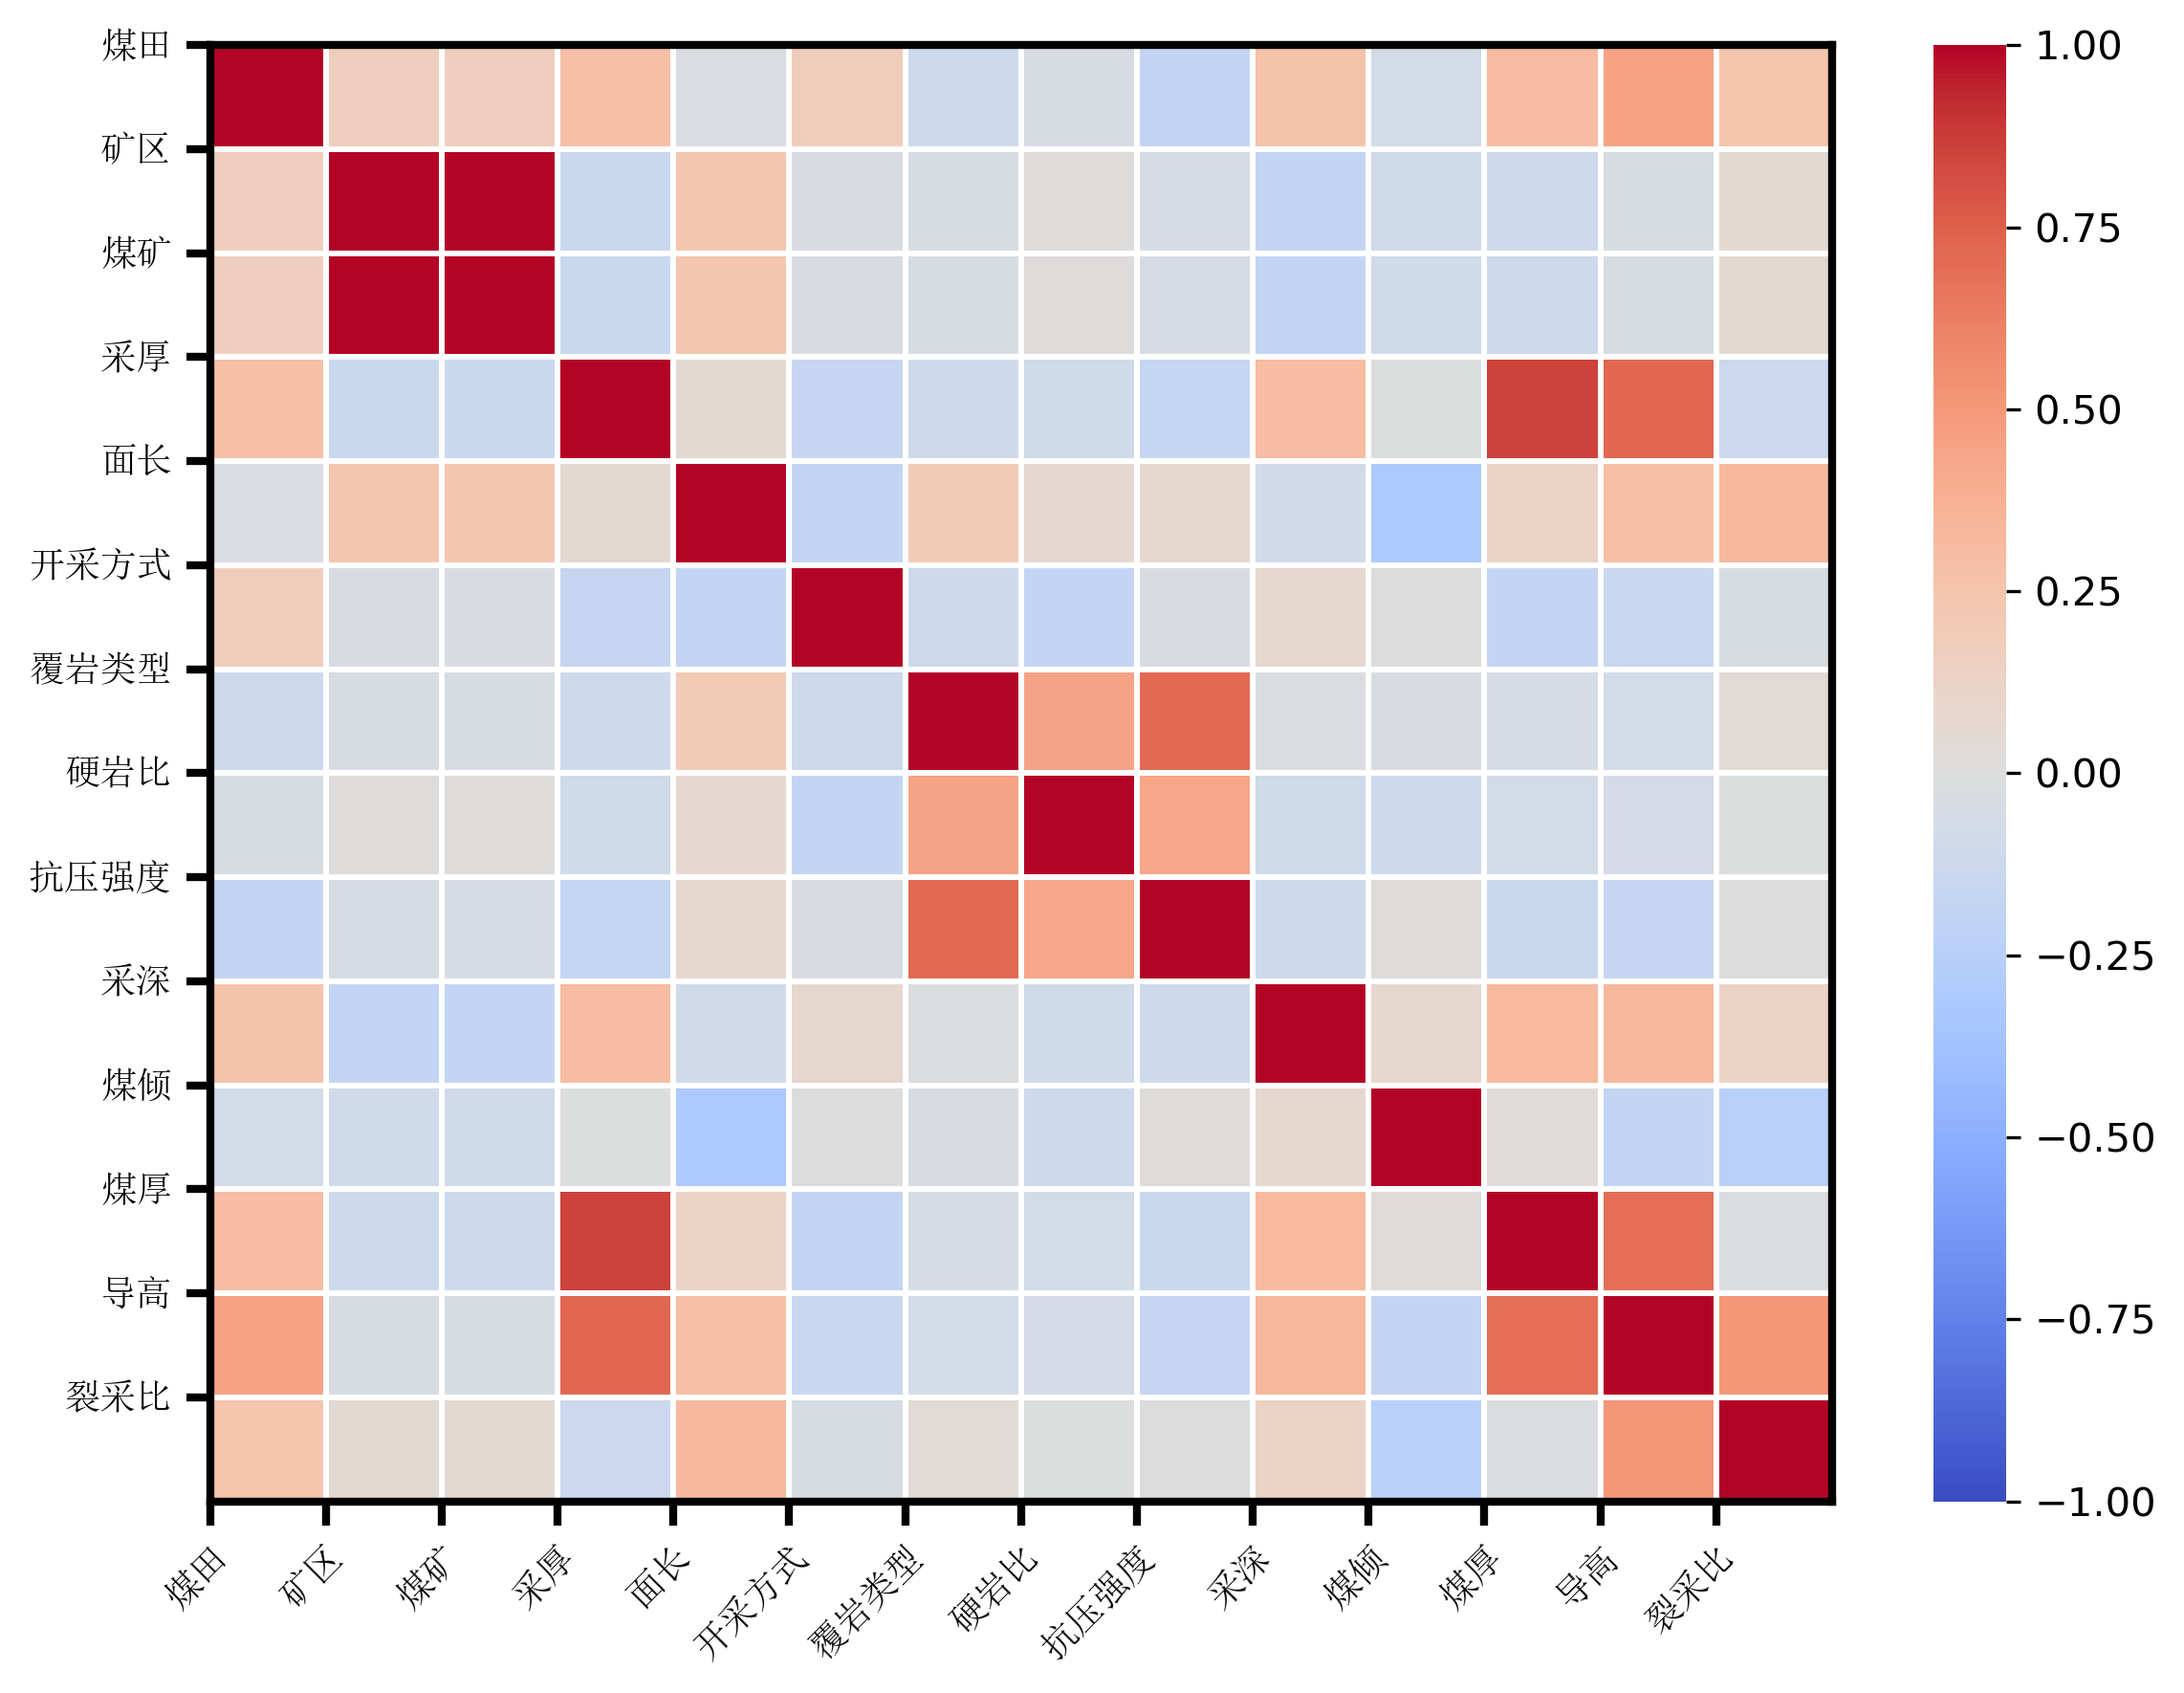

In [14]:
#2024.11.28 sunyu
# 指定中文字体
font = FontProperties(fname=r"c:\windows\Fonts\simsun.ttc", size=9)   # simhei.ttf, 
# 指定英文字体
font_en = FontProperties(fname=r"c:\windows\Fonts\times.ttc", size=9)

# 可视化相关系数
fig, ax = plt.subplots(figsize=(8,6),dpi=300)

#im = ax.imshow(corr_matrix.values, cmap='Blues') #RdBu_r,'Blues_r'
sns.heatmap(corr_matrix, cmap='coolwarm',fmt=".1f",annot=False, annot_kws={"size": 8, "weight": 'normal', "color": 'black'}, linewidths=1, cbar=True, square=False, vmin=-1, vmax=1.0)
# 设置x轴、y轴标签
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontproperties=font)
ax.set_yticklabels(corr_matrix.columns, fontproperties=font)
# 添加框线和坐标轴, 确保框线显示
ax.spines['top'].set_visible(True)   # 上边框
ax.spines['top'].set_linewidth(2)   # 边框宽度
ax.spines['top'].set_color('black') # 上边框颜色
ax.spines['right'].set_visible(True) # 右边框
ax.spines['right'].set_linewidth(2) # 边框宽度
ax.spines['right'].set_color('black') # 右边框颜色
ax.spines['bottom'].set_visible(True) # 下边框
ax.spines['bottom'].set_linewidth(2) # 边框宽度
ax.spines['bottom'].set_color('black') # 下边框颜色
ax.spines['left'].set_visible(True)   # 左边框
ax.spines['left'].set_linewidth(2)   # 边框宽度
ax.spines['left'].set_color('black') # 左边框颜色
# 添加刻度线
#
# plt.rcParams.update({'xtick.direction': 'in', 'ytick.direction': 'in'})  # 设置x轴和y轴刻度线方向向内
#ax.tick_params(axis='both', which='major', length=6, width=2, colors='black')  # 主刻度线
#ax.tick_params(axis='both', which='minor', length=3, width=1, colors='gray')   # 次刻度线

# 将x轴标签旋转45度以便更好的展示
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")

#plt.yticks(fontsize=9, rotation=0)


# 设置图像标题
#ax.set_title("相关系数矩阵", fontproperties=font,fontsize=10.5, fontweight='bold')

# 确保框线和刻度线显示
plt.rcParams.update({'xtick.direction': 'in', 'ytick.direction': 'in'})  # 设置x轴和y轴刻度线方向向内
ax.tick_params(axis='both', which='both', length=6, width=2, colors='black')
#保存为不同类型的文件
#plt.savefig("correlation.png",bbox_inches='tight', dpi=300)
plt.savefig("correlation_heatmap20241128.png", bbox_inches='tight',dpi=400)
#plt.savefig("correlation_heatmap.tif", bbox_inches='tight',dpi=400)
#plt.savefig("correlation_heatmap.eps", bbox_inches='tight',dpi=400)
#plt.savefig("correlation_heatmap.pdf", bbox_inches='tight',dpi=400)
#plt.savefig("correlation_heatmap.svg")
# 显示图像
plt.tight_layout()
plt.show()

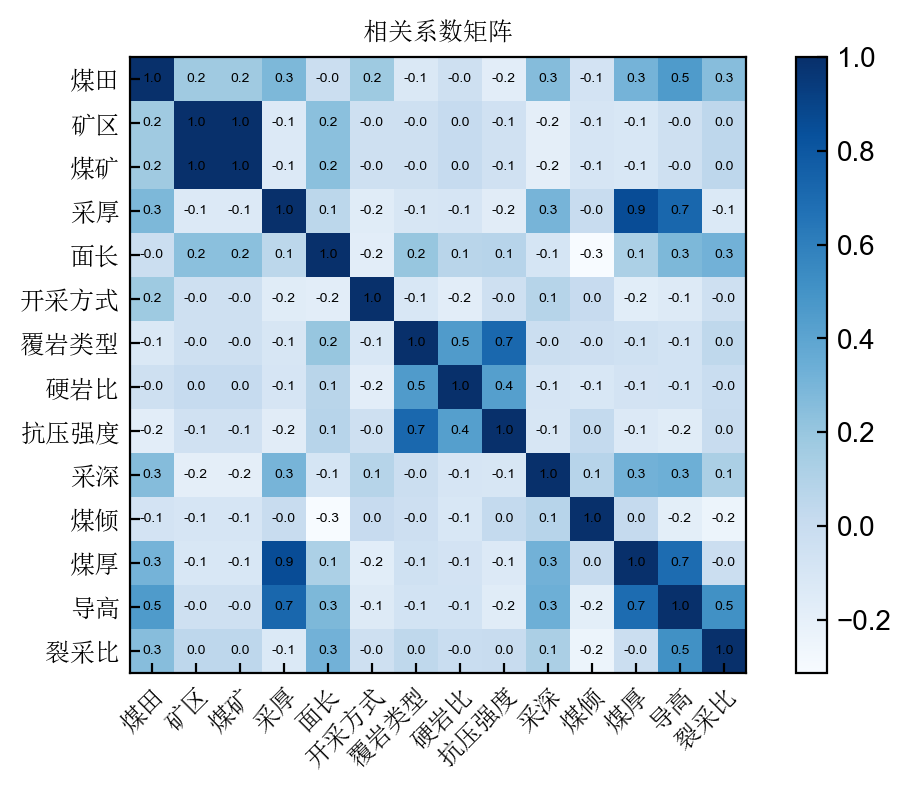

In [15]:
# 指定中文字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=9)   # simhei.ttf, 
# 指定英文字体
font_en = FontProperties(fname=r"c:\windows\fonts\times.ttc", size=9)
# 可视化相关系数
fig, ax = plt.subplots(figsize=(6,3),dpi=200)
im = ax.imshow(corr_matrix.values, cmap='Blues')

# 添加颜色条
cbar = ax.figure.colorbar(im, ax=ax)
sns.set(font_scale=0.6)
# 设置x轴、y轴标签
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontproperties=font)
ax.set_yticklabels(corr_matrix.columns, fontproperties=font)

# 将x轴标签旋转45度以便更好的展示
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# 在热力图上显示相关系数数值
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.values[i, j], 1),
                       ha="center", va="center", color="black",fontsize=5)

# 设置图像标题
ax.set_title("相关系数矩阵", fontproperties=font)
fig.set_size_inches(6.5,4, forward=True)
plt.savefig("correlation.png",bbox_inches='tight', dpi=300)

# 显示图像
plt.show()

# sns.heatmap demo
Pass a DataFrame to plot with indices as row/column labels:

In [16]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<Axes: xlabel='Task', ylabel='Model'>

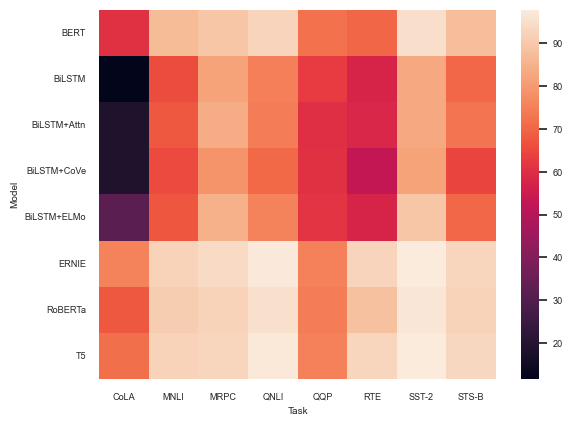

In [17]:
sns.heatmap(glue)

<Axes: xlabel='Task', ylabel='Model'>

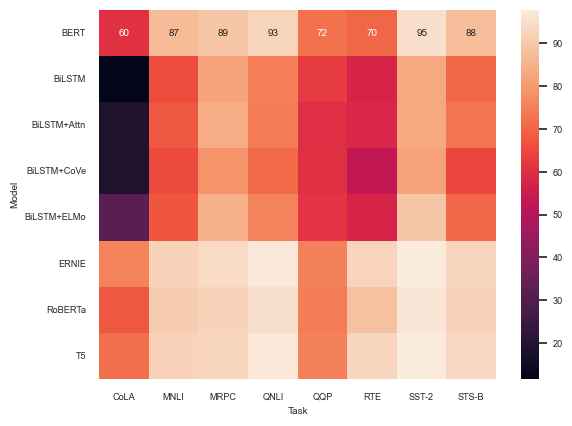

In [18]:
# Use annot to represent the cell values with text: 使用注释以文本表示单元格值：
sns.heatmap(glue, annot=True)

<Axes: xlabel='Task', ylabel='Model'>

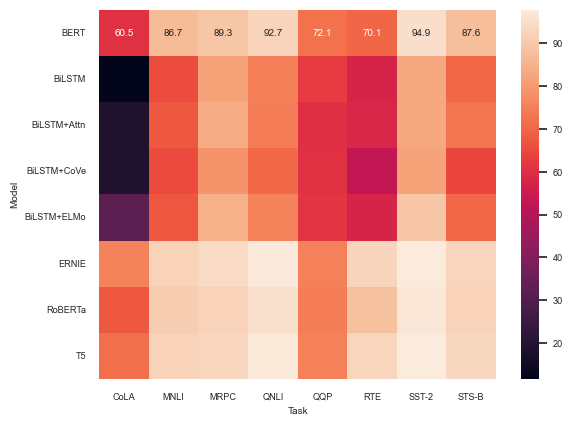

In [19]:
# Control the annotations with a formatting string: 使用格式字符串控制注释：
sns.heatmap(glue, annot=True, fmt=".1f")

<Axes: xlabel='Task', ylabel='Model'>

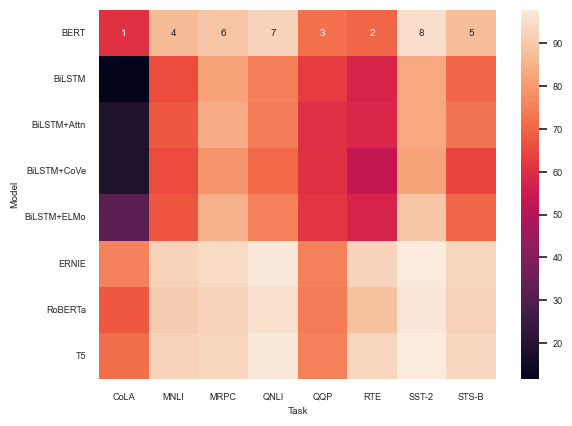

In [20]:
# Use a separate dataframe for the annotations: 使用单独的数据框进行注释：
sns.heatmap(glue, annot=glue.rank(axis="columns"))

<Axes: xlabel='Task', ylabel='Model'>

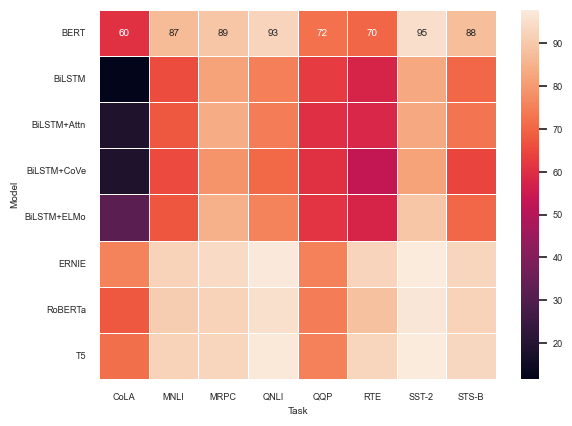

In [21]:
# Add lines between cells:
sns.heatmap(glue, annot=True, linewidth=.5)

<Axes: xlabel='Task', ylabel='Model'>

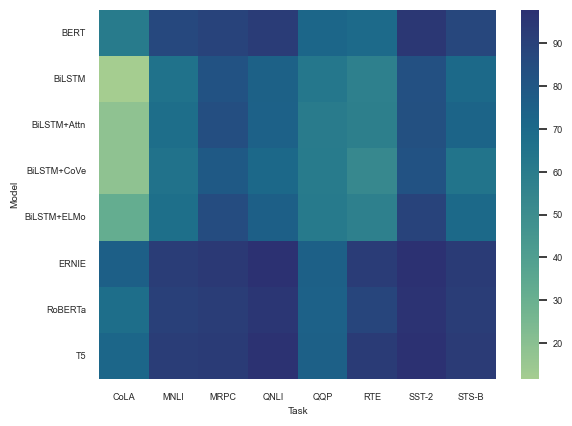

In [22]:
# Select a different colormap by name:
sns.heatmap(glue, cmap="crest")  #"BuPu"

<Axes: xlabel='Task', ylabel='Model'>

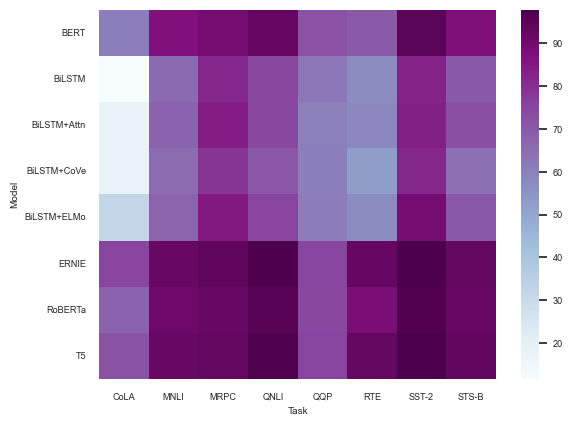

In [23]:
# Select a different colormap by name:
sns.heatmap(glue, cmap="BuPu")  #"BuPu"

<Axes: xlabel='Task', ylabel='Model'>

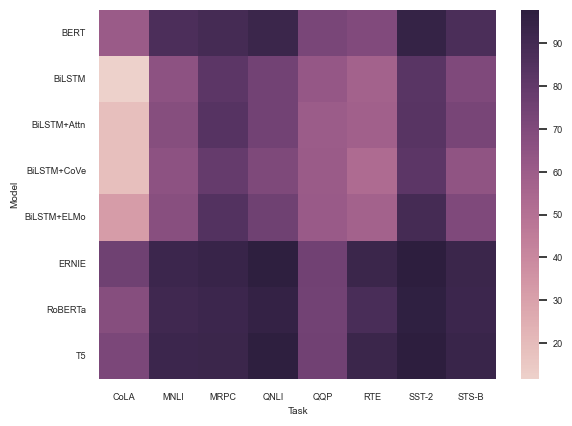

In [24]:
# Or pass a colormap object:
sns.heatmap(glue, cmap=sns.cubehelix_palette(as_cmap=True))

<Axes: xlabel='Task', ylabel='Model'>

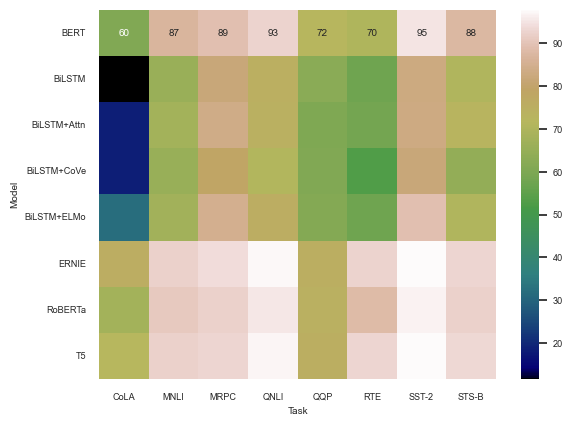

In [25]:
sns.heatmap(glue,annot=True,cmap="gist_earth") #cmap="YlGnBu", 'bwr','viridis','Blues',"gist_earth"

<Axes: xlabel='Task', ylabel='Model'>

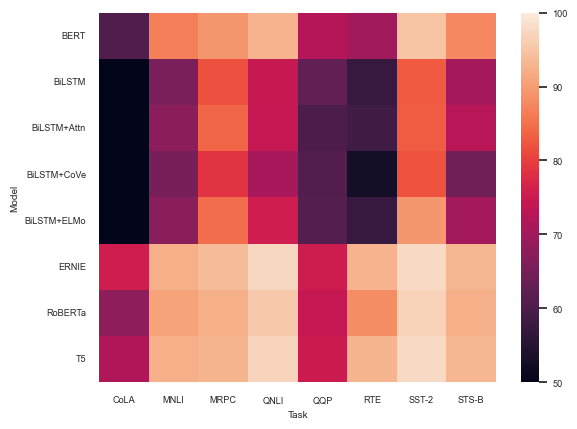

In [26]:
# Set the colormap norm (data values corresponding to minimum and maximum points): 设置颜色图范数（最小点和最大点对应的数据值）：
sns.heatmap(glue, vmin=50, vmax=100)

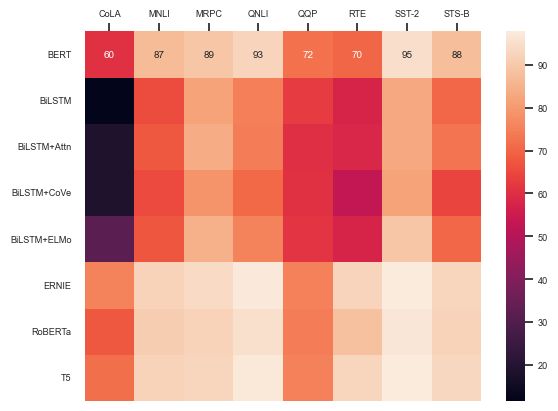

In [27]:
ax = sns.heatmap(glue, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

<Axes: xlabel='Task', ylabel='Model'>

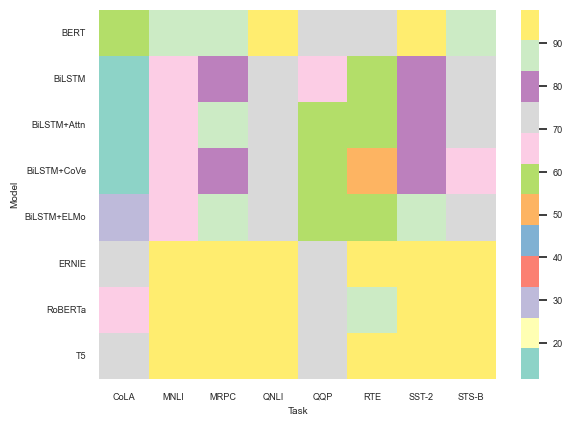

In [28]:
sns.heatmap(glue,cmap=plt.get_cmap('Set3'))

In [29]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [30]:
# These colors have the same ordering as the default matplotlib color palette, "tab10", but they are a bit less intense. Compare:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

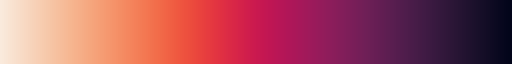

In [31]:
# Seaborn in fact has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind. These span a range of average luminance and saturation values:
#sns.color_palette("rocket", as_cmap=True)
#sns.color_palette("mako", as_cmap=True)
#sns.color_palette("flare", as_cmap=True)
#sns.color_palette("crest", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)
#sns.color_palette("viridis", as_cmap=True)
sns.color_palette("rocket_r", as_cmap=True)

## Discrete vs. continuous mapping
One thing to be aware of is that seaborn can generate discrete values from sequential colormaps and, when doing so, it will not use the most extreme values. Compare the discrete version of "rocket" against the continuous version shown above:

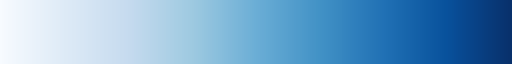

In [32]:
#sns.light_palette("seagreen", as_cmap=True)
#sns.dark_palette("#69d", reverse=True, as_cmap=True)
#sns.color_palette("light:b", as_cmap=True)
#sns.color_palette("dark:salmon_r", as_cmap=True)
#sns.color_palette("dark:salmon_r", as_cmap=True)
sns.color_palette("Blues", as_cmap=True)     #色度依次增加，请看右边图例颜色变化）
#sns.color_palette("Blues_r", as_cmap=True)   #色度依次递减，注意比较右边图例颜色变化
#sns.color_palette("YlOrBr", as_cmap=True)
#sns.color_palette("vlag", as_cmap=True)
#sns.color_palette("icefire", as_cmap=True)
#sns.color_palette("Spectral", as_cmap=True)
#sns.color_palette("coolwarm", as_cmap=True)

